Name: Gudur Krishna Chaitanya
Roll no: 102117049
email used for gchaitanya_be21@thapar.edu

In [ ]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import transpile
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
from qiskit.result import marginal_counts
from qiskit.quantum_info import random_statevector
import qiskit_aer

In [6]:
qr = QuantumRegister(2, name="Alice")
qr1=QuantumRegister(1, name="Bob")   
crz = ClassicalRegister(1, name="c0")
crx = ClassicalRegister(1, name="c1") 
teleportation_circuit = QuantumCircuit(qr,qr1, crz, crx)

In [7]:
def create_bell_pair(qc, a, b):
    qc.h(a) 
    qc.cx(a,b) 

In [39]:
qr = QuantumRegister(2, name="Alice")
qr1=QuantumRegister(1, name="Bob")
crz, crx = ClassicalRegister(1, name="c0"), ClassicalRegister(1, name="c1")
teleportation_circuit = QuantumCircuit(qr,qr1, crz, crx)
create_bell_pair(teleportation_circuit, 1, 2)
teleportation_circuit.draw(output='text',style='bw')

Alice_0: ──────────
         ┌───┐     
Alice_1: ┤ H ├──■──
         └───┘┌─┴─┐
    Bob: ─────┤ X ├
              └───┘
   c0: 1/══════════
                   
   c1: 1/══════════

In [13]:
def alice_gates(qc, psi, a):
    qc.cx(psi, a)
    qc.h(psi)

In [33]:
qr = QuantumRegister(2, name="Alice")
qr1=QuantumRegister(1, name="Bob")
crz, crx = ClassicalRegister(1, name="c0"), ClassicalRegister(1, name="c1")
teleportation_circuit = QuantumCircuit(qr,qr1,crz, crx)
create_bell_pair(teleportation_circuit, 1, 2)
teleportation_circuit.barrier()
alice_gates(teleportation_circuit, 0, 1)
teleportation_circuit.draw(output='text',style='bw')

░      ┌───┐
Alice_0: ───────────░───■──┤ H ├
         ┌───┐      ░ ┌─┴─┐└───┘
Alice_1: ┤ H ├──■───░─┤ X ├─────
         └───┘┌─┴─┐ ░ └───┘     
    Bob: ─────┤ X ├─░───────────
              └───┘ ░           
   c0: 1/═══════════════════════
                                
   c1: 1/═══════════════════════

In [34]:
def measure_and_send(qc, a, b):
    qc.barrier()
    qc.measure(a,0)
    qc.measure(b,1)

In [35]:
qr = QuantumRegister(2, name="Alice")
qr1=QuantumRegister(1, name="Bob")
crz, crx = ClassicalRegister(1, name="c0"), ClassicalRegister(1, name="c1")
teleportation_circuit = QuantumCircuit(qr,qr1,crz, crx)
create_bell_pair(teleportation_circuit, 1, 2)
teleportation_circuit.barrier() 
alice_gates(teleportation_circuit, 0, 1)
measure_and_send(teleportation_circuit, 0 ,1)
teleportation_circuit.draw(output='text',style='bw')

░      ┌───┐ ░ ┌─┐   
Alice_0: ───────────░───■──┤ H ├─░─┤M├───
         ┌───┐      ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐
Alice_1: ┤ H ├──■───░─┤ X ├──────░──╫─┤M├
         └───┘┌─┴─┐ ░ └───┘      ░  ║ └╥┘
    Bob: ─────┤ X ├─░────────────░──╫──╫─
              └───┘ ░            ░  ║  ║ 
   c0: 1/═══════════════════════════╩══╬═
                                    0  ║ 
   c1: 1/══════════════════════════════╩═
                                       0

In [36]:
def bob_gates(qc, qubit, crz, crx):
    qc.x(qubit).c_if(crx, 1) 
    qc.z(qubit).c_if(crz, 1) 

In [37]:
qr = QuantumRegister(2, name="Alice")
qr1=QuantumRegister(1, name="Bob")
crz, crx = ClassicalRegister(1, name="c0"), ClassicalRegister(1, name="c1")
teleportation_circuit = QuantumCircuit(qr,qr1,crz, crx)
create_bell_pair(teleportation_circuit, 1, 2)
teleportation_circuit.barrier()
alice_gates(teleportation_circuit, 0, 1)
measure_and_send(teleportation_circuit, 0, 1)
teleportation_circuit.barrier() 
bob_gates(teleportation_circuit, 2, crz, crx)
teleportation_circuit.draw(output='text',style='bw')

░      ┌───┐ ░ ┌─┐    ░               
Alice_0: ───────────░───■──┤ H ├─░─┤M├────░───────────────
         ┌───┐      ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐ ░               
Alice_1: ┤ H ├──■───░─┤ X ├──────░──╫─┤M├─░───────────────
         └───┘┌─┴─┐ ░ └───┘      ░  ║ └╥┘ ░  ┌───┐  ┌───┐ 
    Bob: ─────┤ X ├─░────────────░──╫──╫──░──┤ X ├──┤ Z ├─
              └───┘ ░            ░  ║  ║  ░  └─╥─┘  └─╥─┘ 
                                    ║  ║       ║   ┌──╨──┐
   c0: 1/═══════════════════════════╩══╬═══════╬═══╡ 0x1 ╞
                                    0  ║    ┌──╨──┐└─────┘
   c1: 1/══════════════════════════════╩════╡ 0x1 ╞═══════
                                       0    └─────┘

In [ ]:
from qiskit import QuantumCircuit
from qiskit import transpile
from qiskit.visualization import plot_histogram
import qiskit_aer


In [ ]:
def create_bell_pair():
    qc = QuantumCircuit(2)
    qc.h(1)
    qc.cx(1, 0)
    return qc

In [43]:
def encode_message(qc, qubit, msg):
    if len(msg) != 2 or not set(msg).issubset({"0","1"}):
        raise ValueError(f"message '{msg}' is invalid")
    if msg[1] == "1":
        qc.x(qubit)
    if msg[0] == "1":
        qc.z(qubit)
    return qc

In [44]:
def decode_message(qc):
    qc.cx(1, 0)
    qc.h(1)
    return qc

In [45]:
qc = create_bell_pair()
qc.barrier()
message = '10'
qc = encode_message(qc, 1, message)
qc.barrier()
qc = decode_message(qc)
qc.measure_all()
qc.draw(output='text',style='bw')

┌───┐ ░       ░ ┌───┐      ░ ┌─┐   
   q_0: ─────┤ X ├─░───────░─┤ X ├──────░─┤M├───
        ┌───┐└─┬─┘ ░ ┌───┐ ░ └─┬─┘┌───┐ ░ └╥┘┌─┐
   q_1: ┤ H ├──■───░─┤ Z ├─░───■──┤ H ├─░──╫─┤M├
        └───┘      ░ └───┘ ░      └───┘ ░  ║ └╥┘
meas: 2/═══════════════════════════════════╩══╩═
                                           0  1

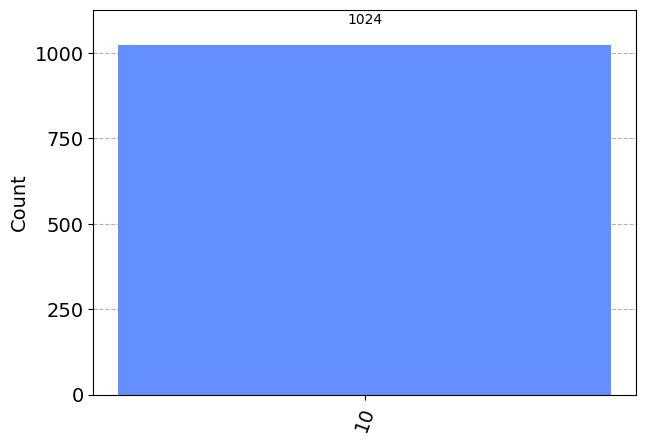

In [59]:
aer_sim = qiskit_aer.Aer.get_backend('aer_simulator')
result = aer_sim.run(qc).result()
counts = result.get_counts(qc)
plot_histogram(counts)


In [62]:
import numpy as np
from qiskit import QuantumCircuit, transpile
import qiskit_aer
from qiskit.visualization import plot_histogram

In [63]:
n = 3

In [64]:
n = 3
const_oracle = QuantumCircuit(n+1)
output = np.random.randint(2)
if output == 1:
    const_oracle.x(n)
const_oracle.draw(output='text',style='bw')

q_0: 
     
q_1: 
     
q_2: 
     
q_3:

In [65]:
balanced_oracle = QuantumCircuit(n+1)
b_str = "101"

In [66]:
balanced_oracle = QuantumCircuit(n+1)
b_str = "101"
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)
balanced_oracle.draw(output='text',style='bw')

┌───┐
q_0: ┤ X ├
     └───┘
q_1: ─────
     ┌───┐
q_2: ┤ X ├
     └───┘
q_3: ─────

In [67]:
balanced_oracle = QuantumCircuit(n+1)
b_str = "101"
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)
balanced_oracle.barrier()
for qubit in range(n):
    balanced_oracle.cx(qubit, n)
balanced_oracle.barrier()
balanced_oracle.draw(output='text',style='bw')

┌───┐ ░                 ░ 
q_0: ┤ X ├─░───■─────────────░─
     └───┘ ░   │             ░ 
q_1: ──────░───┼────■────────░─
     ┌───┐ ░   │    │        ░ 
q_2: ┤ X ├─░───┼────┼────■───░─
     └───┘ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ 
q_3: ──────░─┤ X ├┤ X ├┤ X ├─░─
           ░ └───┘└───┘└───┘ ░

In [68]:
balanced_oracle = QuantumCircuit(n+1)
b_str = "101"
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)
balanced_oracle.barrier()
for qubit in range(n):
    balanced_oracle.cx(qubit, n)
balanced_oracle.barrier()
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)
balanced_oracle.draw(output='text',style='bw')

┌───┐ ░                 ░ ┌───┐
q_0: ┤ X ├─░───■─────────────░─┤ X ├
     └───┘ ░   │             ░ └───┘
q_1: ──────░───┼────■────────░──────
     ┌───┐ ░   │    │        ░ ┌───┐
q_2: ┤ X ├─░───┼────┼────■───░─┤ X ├
     └───┘ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘
q_3: ──────░─┤ X ├┤ X ├┤ X ├─░──────
           ░ └───┘└───┘└───┘ ░

In [69]:
dj_circuit = QuantumCircuit(n+1, n)
for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.x(n)
dj_circuit.h(n)
dj_circuit.draw(output='text',style='bw')

┌───┐     
q_0: ┤ H ├─────
     ├───┤     
q_1: ┤ H ├─────
     ├───┤     
q_2: ┤ H ├─────
     ├───┤┌───┐
q_3: ┤ X ├┤ H ├
     └───┘└───┘
c: 3/══════════

In [70]:
dj_circuit = QuantumCircuit(n+1, n)
for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.x(n)
dj_circuit.h(n)
dj_circuit = dj_circuit.compose(balanced_oracle)
dj_circuit.draw(output='text',style='bw')

┌───┐┌───┐ ░                 ░ ┌───┐
q_0: ┤ H ├┤ X ├─░───■─────────────░─┤ X ├
     ├───┤└───┘ ░   │             ░ └───┘
q_1: ┤ H ├──────░───┼────■────────░──────
     ├───┤┌───┐ ░   │    │        ░ ┌───┐
q_2: ┤ H ├┤ X ├─░───┼────┼────■───░─┤ X ├
     ├───┤├───┤ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘
q_3: ┤ X ├┤ H ├─░─┤ X ├┤ X ├┤ X ├─░──────
     └───┘└───┘ ░ └───┘└───┘└───┘ ░      
c: 3/════════════════════════════════════

In [71]:
dj_circuit = QuantumCircuit(n+1, n)
for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.x(n)
dj_circuit.h(n)
dj_circuit = dj_circuit.compose(balanced_oracle)
for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.barrier()
for i in range(n):
    dj_circuit.measure(i, i)
dj_circuit.draw(output='text',style='bw')

┌───┐┌───┐ ░                 ░ ┌───┐┌───┐ ░ ┌─┐      
q_0: ┤ H ├┤ X ├─░───■─────────────░─┤ X ├┤ H ├─░─┤M├──────
     ├───┤└───┘ ░   │             ░ ├───┤└───┘ ░ └╥┘┌─┐   
q_1: ┤ H ├──────░───┼────■────────░─┤ H ├──────░──╫─┤M├───
     ├───┤┌───┐ ░   │    │        ░ ├───┤┌───┐ ░  ║ └╥┘┌─┐
q_2: ┤ H ├┤ X ├─░───┼────┼────■───░─┤ X ├┤ H ├─░──╫──╫─┤M├
     ├───┤├───┤ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘└───┘ ░  ║  ║ └╥┘
q_3: ┤ X ├┤ H ├─░─┤ X ├┤ X ├┤ X ├─░────────────░──╫──╫──╫─
     └───┘└───┘ ░ └───┘└───┘└───┘ ░            ░  ║  ║  ║ 
c: 3/═════════════════════════════════════════════╩══╩══╩═
                                                  0  1  2

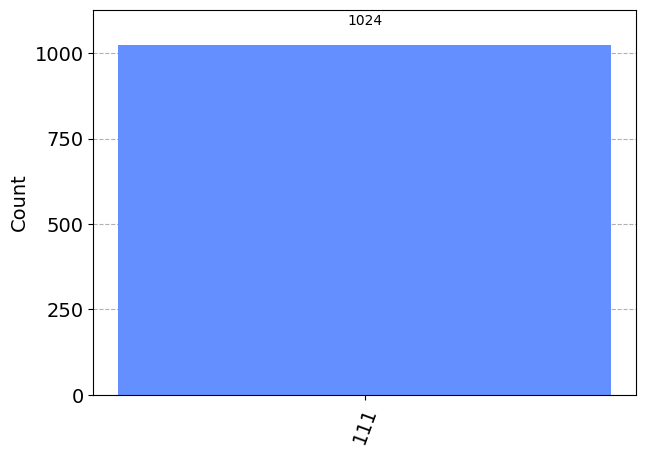

In [30]:
aer_sim = qiskit_aer.Aer.get_backend('aer_simulator')
results = aer_sim.run(dj_circuit).result()
answer = results.get_counts()
plot_histogram(answer)

In [73]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from math import gcd
from numpy.random import randint
import pandas as pd
from fractions import Fraction
import qiskit_aer

/opt/conda/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/opt/conda/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


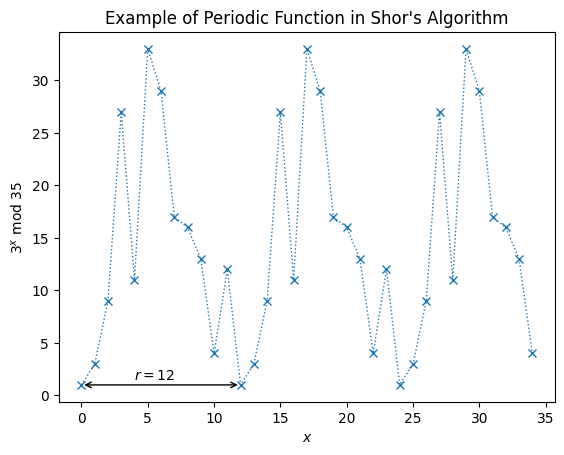

In [74]:
N = 35
a = 3
xvals = np.arange(35)
yvals = [np.mod(a**x, N) for x in xvals]
fig, ax = plt.subplots()
ax.plot(xvals, yvals, linewidth=1, linestyle='dotted', marker='x')
ax.set(xlabel='$x$', ylabel=f'${a}^x$ mod ${N}$',
       title="Example of Periodic Function in Shor's Algorithm")
try: 
    r = yvals[1:].index(1) + 1
    plt.annotate('', xy=(0,1), xytext=(r,1),
                 arrowprops=dict(arrowstyle='<->'))
    plt.annotate(f'$r={r}$', xy=(r/3,1.5))
except ValueError:
    print('Could not find period, check a < N and have no common factors.')

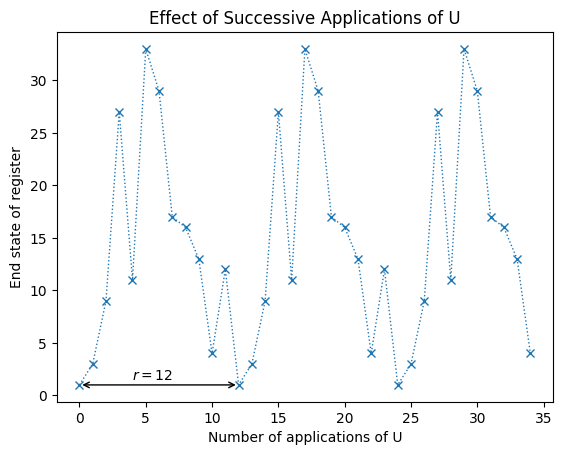

In [75]:
ax.set(xlabel='Number of applications of U',
       ylabel='End state of register',
       title="Effect of Successive Applications of U")
fig

In [76]:
def c_amod15(a, power):
    if a not in [2,4,7,8,11,13]:
        raise ValueError("'a' must be 2,4,7,8,11 or 13")
    U = QuantumCircuit(4)
    for _iteration in range(power):
        if a in [2,13]:
            U.swap(2,3)
            U.swap(1,2)
            U.swap(0,1)
        if a in [7,8]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
        if a in [4, 11]:
            U.swap(1,3)
            U.swap(0,2)
        if a in [7,11,13]:
            for q in range(4):
                U.x(q)
    U = U.to_gate()
    U.name = f"{a}^{power} mod 15"
    c_U = U.control()
    return c_U

In [77]:
N_COUNT = 8 
a = 7

In [78]:
def qft_dagger(n):
    qc = QuantumCircuit(n)
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-np.pi/float(2**(j-m)), m, j)
        qc.h(j)
    qc.name = "QFT†"
    return qc

In [79]:
qc = QuantumCircuit(N_COUNT + 4, N_COUNT)
for q in range(N_COUNT):
    qc.h(q)
qc.x(N_COUNT)
for q in range(N_COUNT):
    qc.append(c_amod15(a, 2**q),
             [q] + [i+N_COUNT for i in range(4)])
qc.append(qft_dagger(N_COUNT), range(N_COUNT))
qc.measure(range(N_COUNT), range(N_COUNT))
qc.draw(fold=-1,output='text',style='bw')  

┌───┐                                                                                                                             ┌───────┐┌─┐                     
 q_0: ┤ H ├───────■─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤0      ├┤M├─────────────────────
      ├───┤       │                                                                                                                     │       │└╥┘┌─┐                  
 q_1: ┤ H ├───────┼──────────────■──────────────────────────────────────────────────────────────────────────────────────────────────────┤1      ├─╫─┤M├──────────────────
      ├───┤       │              │                                                                                                      │       │ ║ └╥┘┌─┐               
 q_2: ┤ H ├───────┼──────────────┼──────────────■───────────────────────────────────────────────────────────────────────────────────────┤2      ├─╫──╫─┤M├───────────────
      ├───┤       │              │              │                                                                                       │       │ ║  ║ └╥┘┌─┐            
 q_3: ┤ H ├───────┼──────────────┼──────────────┼──────────────■────────────────────────────────────────────────────────────────────────┤3      ├─╫──╫──╫─┤M├────────────
      ├───┤       │              │              │              │                                                                        │  QFT† │ ║  ║  ║ └╥┘┌─┐         
 q_4: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼──────────────■─────────────────────────────────────────────────────────┤4      ├─╫──╫──╫──╫─┤M├─────────
      ├───┤       │              │              │              │              │                                                         │       │ ║  ║  ║  ║ └╥┘┌─┐      
 q_5: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼──────────────┼───────────────■─────────────────────────────────────────┤5      ├─╫──╫──╫──╫──╫─┤M├──────
      ├───┤       │              │              │              │              │               │                                         │       │ ║  ║  ║  ║  ║ └╥┘┌─┐   
 q_6: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼──────────────┼───────────────┼───────────────■─────────────────────────┤6      ├─╫──╫──╫──╫──╫──╫─┤M├───
      ├───┤       │              │              │              │              │               │               │                         │       │ ║  ║  ║  ║  ║  ║ └╥┘┌─┐
 q_7: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼──────────────┼───────────────┼───────────────┼────────────────■────────┤7      ├─╫──╫──╫──╫──╫──╫──╫─┤M├
      ├───┤┌──────┴──────┐┌──────┴──────┐┌──────┴──────┐┌──────┴──────┐┌──────┴───────┐┌──────┴───────┐┌──────┴───────┐┌───────┴───────┐└───────┘ ║  ║  ║  ║  ║  ║  ║ └╥┘
 q_8: ┤ X ├┤0            ├┤0            ├┤0            ├┤0            ├┤0             ├┤0             ├┤0             ├┤0              ├──────────╫──╫──╫──╫──╫──╫──╫──╫─
      └───┘│             ││             ││             ││             ││              ││              ││              ││               │          ║  ║  ║  ║  ║  ║  ║  ║ 
 q_9: ─────┤1            ├┤1            ├┤1            ├┤1            ├┤1             ├┤1             ├┤1             ├┤1              ├──────────╫──╫──╫──╫──╫──╫──╫──╫─
           │  7^1 mod 15 ││  7^2 mod 15 ││  7^4 mod 15 ││  7^8 mod 15 ││  7^16 mod 15 ││  7^32 mod 15 ││  7^64 mod 15 ││  7^128 mod 15 │          ║  ║  ║  ║  ║  ║  ║  ║ 
q_10: ─────┤2            ├┤2            ├┤2            ├┤2            ├┤2             ├┤2             ├┤2             ├┤2              ├──────────╫──╫──╫──╫──╫──╫──╫──╫─
           │             ││             ││             ││             ││              ││              ││              ││               │          ║  ║  ║  ║  ║  ║  ║  ║ 
q_11: ─────┤3            ├┤3            ├┤3            ├┤3            ├┤3             ├┤3       

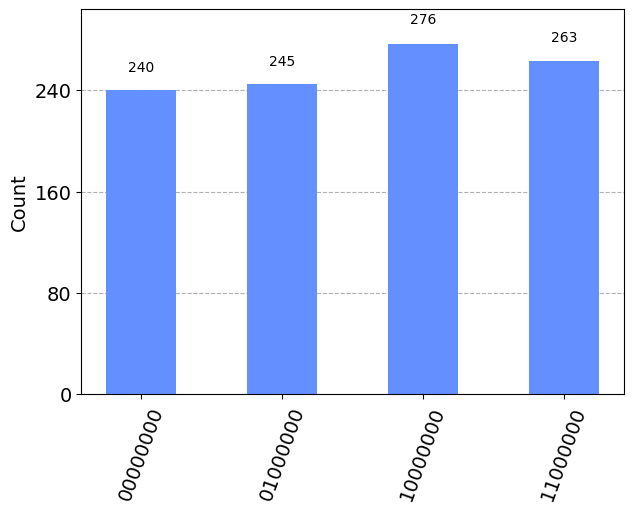

In [80]:
aer_sim = qiskit_aer.Aer.get_backend('aer_simulator')
t_qc = transpile(qc, aer_sim)
counts = aer_sim.run(t_qc).result().get_counts()
plot_histogram(counts)

In [81]:
rows, measured_phases = [], []
for output in counts:
    decimal = int(output, 2)  
    phase = decimal/(2**N_COUNT)  
    measured_phases.append(phase)
    rows.append([f"{output}(bin) = {decimal:>3}(dec)",
                 f"{decimal}/{2**N_COUNT} = {phase:.2f}"])
headers=["Register Output", "Phase"]
df = pd.DataFrame(rows, columns=headers)
print(df)

            Register Output           Phase
0  01000000(bin) =  64(dec)   64/256 = 0.25
1  00000000(bin) =   0(dec)    0/256 = 0.00
2  10000000(bin) = 128(dec)  128/256 = 0.50
3  11000000(bin) = 192(dec)  192/256 = 0.75


In [82]:
Fraction(0.666)

Fraction(5998794703657501, 9007199254740992)

In [83]:
Fraction(0.666).limit_denominator(15)

Fraction(2, 3)

In [84]:
rows = []
for phase in measured_phases:
    frac = Fraction(phase).limit_denominator(15)
    rows.append([phase,
                 f"{frac.numerator}/{frac.denominator}",
                 frac.denominator])
# Print as a table
headers=["Phase", "Fraction", "Guess for r"]
df = pd.DataFrame(rows, columns=headers)
print(df)

   Phase Fraction  Guess for r
0   0.25      1/4            4
1   0.00      0/1            1
2   0.50      1/2            2
3   0.75      3/4            4


In [85]:
def a2jmodN(a, j, N):
    for _ in range(j):
        a = np.mod(a**2, N)
    return a

In [86]:
a2jmodN(7, 2049, 53)

47

In [87]:
N = 15

In [88]:
np.random.seed(1)
a = randint(2, 15)
print(a)

7


In [89]:
from math import gcd 
gcd(a, N)

1

In [90]:
def qpe_amod15(a):
    N_COUNT = 8
    qc = QuantumCircuit(4+N_COUNT, N_COUNT)
    for q in range(N_COUNT):
        qc.h(q)    
    qc.x(N_COUNT)
    for q in range(N_COUNT): 
        qc.append(c_amod15(a, 2**q),
                 [q] + [i+N_COUNT for i in range(4)])
    qc.append(qft_dagger(N_COUNT), range(N_COUNT))
    qc.measure(range(N_COUNT), range(N_COUNT))
    aer_sim = qiskit_aer.Aer.get_backend('aer_simulator')
    job = aer_sim.run(transpile(qc, aer_sim), shots=1, memory=True)
    readings = job.result().get_memory()
    print("Register Reading: " + readings[0])
    phase = int(readings[0],2)/(2**N_COUNT)
    print(f"Corresponding Phase: {phase}")
    return phase

In [91]:
phase = qpe_amod15(a) 
Fraction(phase).limit_denominator(15)

Register Reading: 10000000
Corresponding Phase: 0.5


Fraction(1, 2)

In [92]:
frac = Fraction(phase).limit_denominator(15)
s, r = frac.numerator, frac.denominator
print(r)

2


In [93]:
guesses = [gcd(a**(r//2)-1, N), gcd(a**(r//2)+1, N)]
print(guesses)

[3, 1]


In [94]:
FACTOR_FOUND = False
ATTEMPT = 0
while not FACTOR_FOUND:
    ATTEMPT += 1
    print(f"\nATTEMPT {ATTEMPT}:")
    phase = qpe_amod15(a)
    frac = Fraction(phase).limit_denominator(N)
    r = frac.denominator
    print(f"Result: r = {r}")
    if phase != 0:
        guesses = [gcd(a**(r//2)-1, N), gcd(a**(r//2)+1, N)]
        print(f"Guessed Factors: {guesses[0]} and {guesses[1]}")
        for guess in guesses:
            if guess not in [1,N] and (N % guess) == 0:
                print(f"*** Non-trivial factor found: {guess} ***")
                FACTOR_FOUND = True


ATTEMPT 1:
Register Reading: 10000000
Corresponding Phase: 0.5
Result: r = 2
Guessed Factors: 3 and 1
*** Non-trivial factor found: 3 ***


In [95]:
import matplotlib.pyplot as plt
import numpy as np
import math
from qiskit import transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
import qiskit_aer
from qiskit.visualization import plot_histogram

In [96]:
n = 2
grover_circuit = QuantumCircuit(n)

In [97]:
def initialize_s(qc, qubits):
    for q in qubits:
        qc.h(q)
    return qc

In [98]:
grover_circuit = initialize_s(grover_circuit, [0,1])
grover_circuit.draw(output='text',style='bw')

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     └───┘

In [99]:
grover_circuit.cz(0,1) 
grover_circuit.draw(output='text',style='bw')

┌───┐   
q_0: ┤ H ├─■─
     ├───┤ │ 
q_1: ┤ H ├─■─
     └───┘

In [100]:
grover_circuit.h([0,1])
grover_circuit.z([0,1])
grover_circuit.cz(0,1)
grover_circuit.h([0,1])
grover_circuit.draw(output='text',style='bw')

┌───┐   ┌───┐┌───┐   ┌───┐
q_0: ┤ H ├─■─┤ H ├┤ Z ├─■─┤ H ├
     ├───┤ │ ├───┤├───┤ │ ├───┤
q_1: ┤ H ├─■─┤ H ├┤ Z ├─■─┤ H ├
     └───┘   └───┘└───┘   └───┘

In [101]:
sv_sim = qiskit_aer.Aer.get_backend('statevector_simulator')
result = sv_sim.run(grover_circuit).result()
statevec = result.get_statevector()
from qiskit.visualization import array_to_latex
array_to_latex(statevec, prefix="|\\psi\\rangle =")

<IPython.core.display.Latex object>

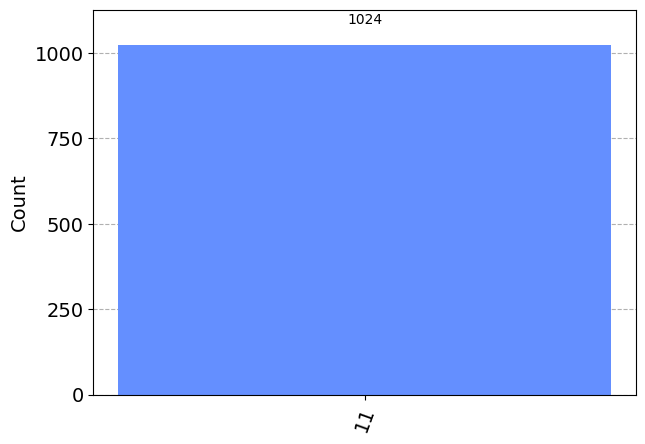

In [102]:
grover_circuit.measure_all()
qasm_sim = qiskit_aer.Aer.get_backend('qasm_simulator')
result = qasm_sim.run(grover_circuit).result()
counts = result.get_counts()
plot_histogram(counts)

In [103]:
qc = QuantumCircuit(3)
qc.cz(0, 2)
qc.cz(1, 2)
oracle_ex3 = qc.to_gate()
oracle_ex3.name = "U$_\omega$"

In [104]:
def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    for qubit in range(nqubits):
        qc.h(qubit)
    for qubit in range(nqubits):
        qc.x(qubit)
    qc.h(nqubits-1)
    qc.mcx(list(range(nqubits-1)), nqubits-1)
    qc.h(nqubits-1)
    for qubit in range(nqubits):
        qc.x(qubit)
    for qubit in range(nqubits):
        qc.h(qubit)
    U_s = qc.to_gate()
    U_s.name = "U$_s$"
    return U_s

In [107]:
n = 3
grover_circuit = QuantumCircuit(n)
grover_circuit = initialize_s(grover_circuit, [0,1,2])
grover_circuit.append(oracle_ex3, [0,1,2])
grover_circuit.append(diffuser(n), [0,1,2])
grover_circuit.measure_all()
grover_circuit.draw(output='text',style='bw')

┌───┐┌─────────────┐┌────────┐ ░ ┌─┐      
   q_0: ┤ H ├┤0            ├┤0       ├─░─┤M├──────
        ├───┤│             ││        │ ░ └╥┘┌─┐   
   q_1: ┤ H ├┤1 U$_\omega$ ├┤1 U$_s$ ├─░──╫─┤M├───
        ├───┤│             ││        │ ░  ║ └╥┘┌─┐
   q_2: ┤ H ├┤2            ├┤2       ├─░──╫──╫─┤M├
        └───┘└─────────────┘└────────┘ ░  ║  ║ └╥┘
meas: 3/══════════════════════════════════╩══╩══╩═
                                          0  1  2

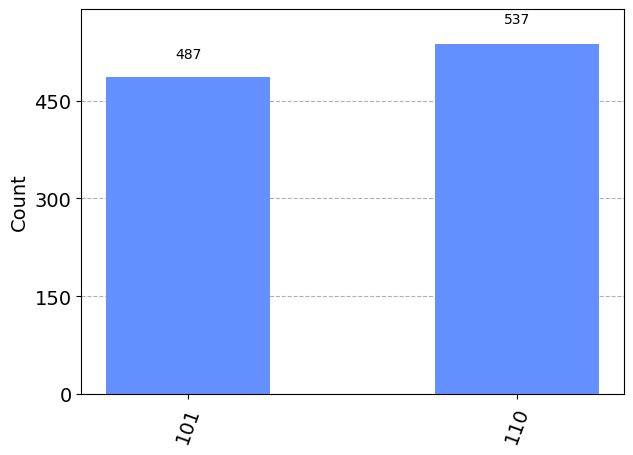

In [106]:
qasm_sim = qiskit_aer.Aer.get_backend('qasm_simulator')
transpiled_grover_circuit = transpile(grover_circuit, qasm_sim)
results = qasm_sim.run(transpiled_grover_circuit).result()
counts = results.get_counts()
plot_histogram(counts)

In [ ]:
# oracle for '101':
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(4, 'q')
creg_c = ClassicalRegister(4, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.x(qreg_q[1])
circuit.ccx(qreg_q[0], qreg_q[1], qreg_q[2])
circuit.ccx(qreg_q[1], qreg_q[2], qreg_q[3])
circuit.x(qreg_q[1])
circuit.measure(qreg_q[3], creg_c[3])

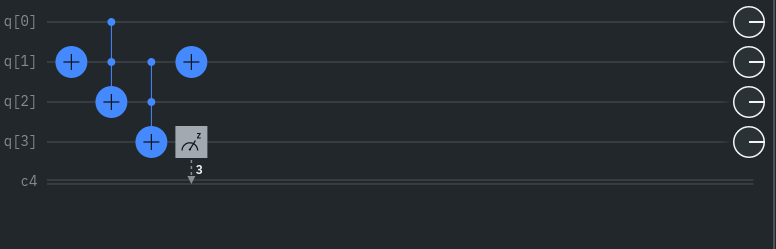

In [108]:
from qiskit import QuantumCircuit, transpile
import qiskit_aer
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from numpy.random import randint
import numpy as np

┌───┐ ░ ┌───┐┌─┐
  q: ┤ H ├─░─┤ H ├┤M├
     └───┘ ░ └───┘└╥┘
c: 1/══════════════╩═
                   0

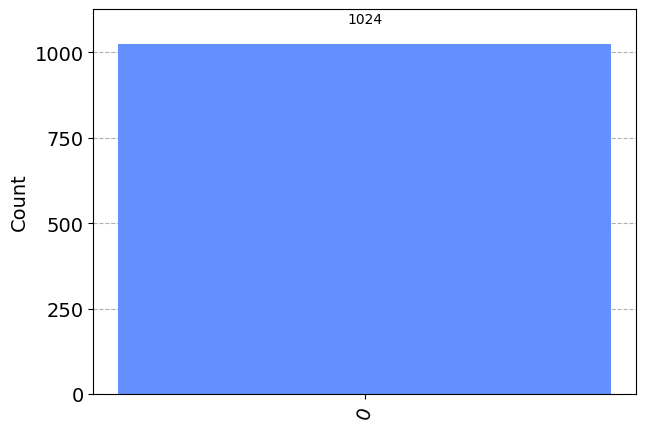

In [109]:
qc = QuantumCircuit(1,1)
qc.h(0)
qc.barrier()
qc.h(0)
qc.measure(0,0)
display(qc.draw(output='text',style='bw'))
aer_sim = qiskit_aer.Aer.get_backend('aer_simulator')
job = aer_sim.run(qc)
plot_histogram(job.result().get_counts())

┌───┐┌─┐ ░ ┌───┐┌─┐
  q: ┤ H ├┤M├─░─┤ H ├┤M├
     └───┘└╥┘ ░ └───┘└╥┘
c: 1/══════╩══════════╩═
           0          0

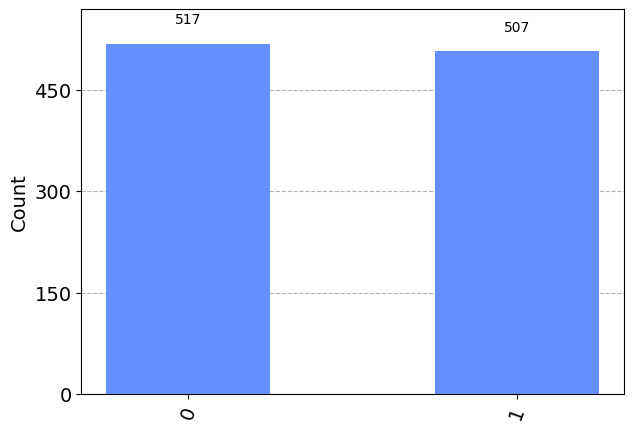

In [110]:
qc = QuantumCircuit(1,1)
qc.h(0)
qc.measure(0, 0)
qc.barrier()
qc.h(0)
qc.measure(0,0)
display(qc.draw(output='text',style='bw'))
aer_sim = qiskit_aer.Aer.get_backend('aer_simulator')
job = aer_sim.run(qc)
plot_histogram(job.result().get_counts())

In [111]:
np.random.seed(seed=0)

In [112]:
n = 100

In [113]:
np.random.seed(seed=0)
n = 100
alice_bits = randint(2, size=n)
print(alice_bits)

[0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0
 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0
 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 0]


In [114]:
np.random.seed(seed=0)
n = 100
alice_bits = randint(2, size=n)
alice_bases = randint(2, size=n)
print(alice_bases)

[1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 0
 0 0 0 1 1 0 0 1 0 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0
 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0]


In [115]:
def encode_message(bits, bases):
    message = []
    for i in range(n):
        qc = QuantumCircuit(1,1)
        if bases[i] == 0:
            if bits[i] == 0:
                pass 
            else:
                qc.x(0)
        else: 
            if bits[i] == 0:
                qc.h(0)
            else:
                qc.x(0)
                qc.h(0)
        qc.barrier()
        message.append(qc)
    return message

In [116]:
np.random.seed(seed=0)
n = 100
alice_bits = randint(2, size=n)
alice_bases = randint(2, size=n)
message = encode_message(alice_bits, alice_bases)

In [117]:
print('bit = %i' % alice_bits[0])
print('basis = %i' % alice_bases[0])

bit = 0
basis = 1


In [118]:
message[0].draw(output='text',style='bw')

┌───┐ ░ 
  q: ┤ H ├─░─
     └───┘ ░ 
c: 1/════════

In [119]:
print('bit = %i' % alice_bits[4])
print('basis = %i' % alice_bases[4])
message[4].draw(output='text',style='bw')

bit = 1
basis = 0


┌───┐ ░ 
  q: ┤ X ├─░─
     └───┘ ░ 
c: 1/════════

In [120]:
np.random.seed(seed=0)
n = 100
alice_bits = randint(2, size=n)
alice_bases = randint(2, size=n)
message = encode_message(alice_bits, alice_bases)
bob_bases = randint(2, size=n)
print(bob_bases)

[1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1
 0 1 0 0 1 0 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 0
 0 0 1 0 1 0 1 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1 1]


In [121]:
def measure_message(message, bases):
    backend = qiskit_aer.Aer.get_backend('aer_simulator')
    measurements = []
    for q in range(n):
        if bases[q] == 0: 
            message[q].measure(0,0)
        if bases[q] == 1: 
            message[q].h(0)
            message[q].measure(0,0)
        aer_sim = qiskit_aer.Aer.get_backend('aer_simulator')
        result = aer_sim.run(message[q], shots=1, memory=True).result()
        measured_bit = int(result.get_memory()[0])
        measurements.append(measured_bit)
    return measurements

In [122]:
np.random.seed(seed=0)
n = 100
alice_bits = randint(2, size=n)
alice_bases = randint(2, size=n)
message = encode_message(alice_bits, alice_bases)
bob_bases = randint(2, size=n)
bob_results = measure_message(message, bob_bases)

In [123]:
message[0].draw(output='text',style='bw')

┌───┐ ░ ┌───┐┌─┐
  q: ┤ H ├─░─┤ H ├┤M├
     └───┘ ░ └───┘└╥┘
c: 1/══════════════╩═
                   0

In [124]:
message[6].draw(output='text',style='bw')

┌───┐ ░ ┌───┐┌─┐
  q: ┤ X ├─░─┤ H ├┤M├
     └───┘ ░ └───┘└╥┘
c: 1/══════════════╩═
                   0

In [125]:
print(bob_results)

[0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1]


In [126]:
def remove_garbage(a_bases, b_bases, bits):
    good_bits = []
    for q in range(n):
        if a_bases[q] == b_bases[q]:
            good_bits.append(bits[q])
    return good_bits

In [127]:
np.random.seed(seed=0)
n = 100
alice_bits = randint(2, size=n)
alice_bases = randint(2, size=n)
message = encode_message(alice_bits, alice_bases)
bob_bases = randint(2, size=n)
bob_results = measure_message(message, bob_bases)
alice_key = remove_garbage(alice_bases, bob_bases, alice_bits)
print(alice_key)

[0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0]


In [128]:
np.random.seed(seed=0)
n = 100
alice_bits = randint(2, size=n)
alice_bases = randint(2, size=n)
message = encode_message(alice_bits, alice_bases)
bob_bases = randint(2, size=n)
bob_results = measure_message(message, bob_bases)
alice_key = remove_garbage(alice_bases, bob_bases, alice_bits)
bob_key = remove_garbage(alice_bases, bob_bases, bob_results)
print(bob_key)

[0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0]


In [129]:
def sample_bits(bits, selection):
    sample = []
    for i in selection:
        i = np.mod(i, len(bits))
        sample.append(bits.pop(i))
    return sample

In [130]:
np.random.seed(seed=0)
n = 100
alice_bits = randint(2, size=n)
alice_bases = randint(2, size=n)
message = encode_message(alice_bits, alice_bases)
bob_bases = randint(2, size=n)
bob_results = measure_message(message, bob_bases)
alice_key = remove_garbage(alice_bases, bob_bases, alice_bits)
bob_key = remove_garbage(alice_bases, bob_bases, bob_results)
sample_size = 15
bit_selection = randint(n, size=sample_size)
bob_sample = sample_bits(bob_key, bit_selection)
print("  bob_sample = " + str(bob_sample))
alice_sample = sample_bits(alice_key, bit_selection)
print("alice_sample = "+ str(alice_sample))

  bob_sample = [0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
alice_sample = [0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]


In [131]:
bob_sample == alice_sample

True

In [132]:
print(bob_key)
print(alice_key)
print("key length = %i" % len(alice_key))

[1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0]
[1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0]
key length = 33


In [133]:
np.random.seed(seed=3)

In [134]:
np.random.seed(seed=3)
alice_bits = randint(2, size=n)
print(alice_bits)

[0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 0 1
 0 0 1 1 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1]


In [135]:
np.random.seed(seed=3)
alice_bits = randint(2, size=n)
alice_bases = randint(2, size=n)
message = encode_message(alice_bits, alice_bases)
print(alice_bases)

[1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 0 0
 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 0 0 1 0 0 1 1 1 1
 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1]


In [136]:
message[0].draw(output='text',style='bw')

┌───┐ ░ 
  q: ┤ H ├─░─
     └───┘ ░ 
c: 1/════════

In [137]:
np.random.seed(seed=3)
alice_bits = randint(2, size=n)
alice_bases = randint(2, size=n)
message = encode_message(alice_bits, alice_bases)
eve_bases = randint(2, size=n)
intercepted_message = measure_message(message, eve_bases)
print(intercepted_message)

[0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1]


In [140]:
message[0].draw(output='text',style='bw')

┌───┐ ░ ┌─┐┌───┐┌─┐
  q: ┤ H ├─░─┤M├┤ H ├┤M├
     └───┘ ░ └╥┘└───┘└╥┘
c: 1/═════════╩═══════╩═
              0       0

In [141]:
np.random.seed(seed=3)
alice_bits = randint(2, size=n)
alice_bases = randint(2, size=n)
message = encode_message(alice_bits, alice_bases)
eve_bases = randint(2, size=n)
intercepted_message = measure_message(message, eve_bases)
bob_bases = randint(2, size=n)
bob_results = measure_message(message, bob_bases)
message[0].draw(output='text',style='bw')

┌───┐ ░ ┌─┐┌───┐┌─┐
  q: ┤ H ├─░─┤M├┤ H ├┤M├
     └───┘ ░ └╥┘└───┘└╥┘
c: 1/═════════╩═══════╩═
              0       0

In [142]:
np.random.seed(seed=3)
alice_bits = randint(2, size=n)
alice_bases = randint(2, size=n)
message = encode_message(alice_bits, alice_bases)
eve_bases = randint(2, size=n)
intercepted_message = measure_message(message, eve_bases)
bob_bases = randint(2, size=n)
bob_results = measure_message(message, bob_bases)
bob_key = remove_garbage(alice_bases, bob_bases, bob_results)
alice_key = remove_garbage(alice_bases, bob_bases, alice_bits)

In [143]:
np.random.seed(seed=3)
alice_bits = randint(2, size=n)
alice_bases = randint(2, size=n)
message = encode_message(alice_bits, alice_bases)
eve_bases = randint(2, size=n)
intercepted_message = measure_message(message, eve_bases)
bob_bases = randint(2, size=n)
bob_results = measure_message(message, bob_bases)
bob_key = remove_garbage(alice_bases, bob_bases, bob_results)
alice_key = remove_garbage(alice_bases, bob_bases, alice_bits)
sample_size = 15
bit_selection = randint(n, size=sample_size)
bob_sample = sample_bits(bob_key, bit_selection)
print("  bob_sample = " + str(bob_sample))
alice_sample = sample_bits(alice_key, bit_selection)
print("alice_sample = "+ str(alice_sample))

  bob_sample = [1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1]
alice_sample = [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]


In [144]:
bob_sample == alice_sample

False

In [145]:
n = 100
alice_bits = randint(2, size=n)
alice_bases = randint(2, size=n)
message = encode_message(alice_bits, alice_bases)
eve_bases = randint(2, size=n)
intercepted_message = measure_message(message, eve_bases)
bob_bases = randint(2, size=n)
bob_results = measure_message(message, bob_bases)
bob_key = remove_garbage(alice_bases, bob_bases, bob_results)
alice_key = remove_garbage(alice_bases, bob_bases, alice_bits)
sample_size = 15 
bit_selection = randint(n, size=sample_size)
bob_sample = sample_bits(bob_key, bit_selection)
alice_sample = sample_bits(alice_key, bit_selection)
if bob_sample != alice_sample:
    print("Eve's interference was detected.")
else:
    print("Eve went undetected!")

Eve's interference was detected.
